In [1]:
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def show_imgs(imgs, cols=10):
    n = len(imgs)
    rows = (n // cols) + 1
    figure, axs = plt.subplots(rows, cols, figsize=(20, 20))
    axs = trim_axs(axs, n)
    for i, (ax, img) in enumerate(zip(axs, imgs)):
        ax.imshow(img, cmap='gray')
        ax.set_axis_off()

    plt.show()

In [3]:
class RawDataset:
    def __init__(self, data_csv, img_dir, msk_dir):
        self.df = pd.read_csv(data_csv)
        self.img_dir = img_dir
        self.msk_dir = msk_dir
        self.img_fns = list(self.df['ImageId'])
        self.msk_fns = list(self.df['MaskId'])
        self.pid_df = self._get_pid_df()

    def show_patient_info(self, idx):
        print(self.pid_df.iloc[idx, :])

    def _get_pid_df(self):
        pids = self.df['ImageId'].apply(lambda x: x.split("_")[0]).reset_index(name='PatientId')
        return pids.groupby('PatientId').size().reset_index(name='ImageNum')
    
    def __getitem__(self, idx):
        img_pth = os.path.join(self.img_dir, self.img_fns[idx])
        msk_pth = os.path.join(self.msk_dir, self.msk_fns[idx])
        img = np.array(Image.open(img_pth))
        msk = np.array(Image.open(msk_pth))
        
        return img, msk
    
    def __len__(self):
        return len(self.img_fns)

In [14]:
raw_root_img_dir = 'D:/home/school/ntut/lab/dataset/chest-ct-segmentation/raw_data/images'
raw_root_msk_dir = 'D:/home/school/ntut/lab/dataset/chest-ct-segmentation/raw_data/masks'
root_corcta_dcm_jpg_dir = 'D:/home/school/ntut/lab/dataset/corcta_dcm_jpg'
crop_root_img_dir = 'D:/home/school/ntut/lab/dataset/chest-ct-segmentation/crop_data/images'
crop_root_msk_dir = 'D:/home/school/ntut/lab/dataset/chest-ct-segmentation/crop_data/masks'
raw_csv_file = 'D:/home/school/ntut/lab/dataset/chest-ct-segmentation/raw_data/train.csv'

In [5]:
raw_ds = RawDataset(raw_csv_file, raw_root_img_dir, raw_root_msk_dir)
pid_df = raw_ds.pid_df
img_nums = list(pid_df['ImageNum'])
widths = set([x.shape[0] for x, _ in tqdm(raw_ds)])
print(f'Num of imgs: {len(raw_ds)}')
print(f'Num of patients: {len(raw_ds.pid_df)}')
print(f'Max num of img in single patients: {max(img_nums)}')
print(f'Max num of img in single patients: {min(img_nums)}')
print(f'width of imgs: {widths}')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16708/16708 [00:54<00:00, 308.28it/s]

Num of imgs: 16708
Num of patients: 112
Max num of img in single patients: 574
Max num of img in single patients: 17
width of imgs: {512}


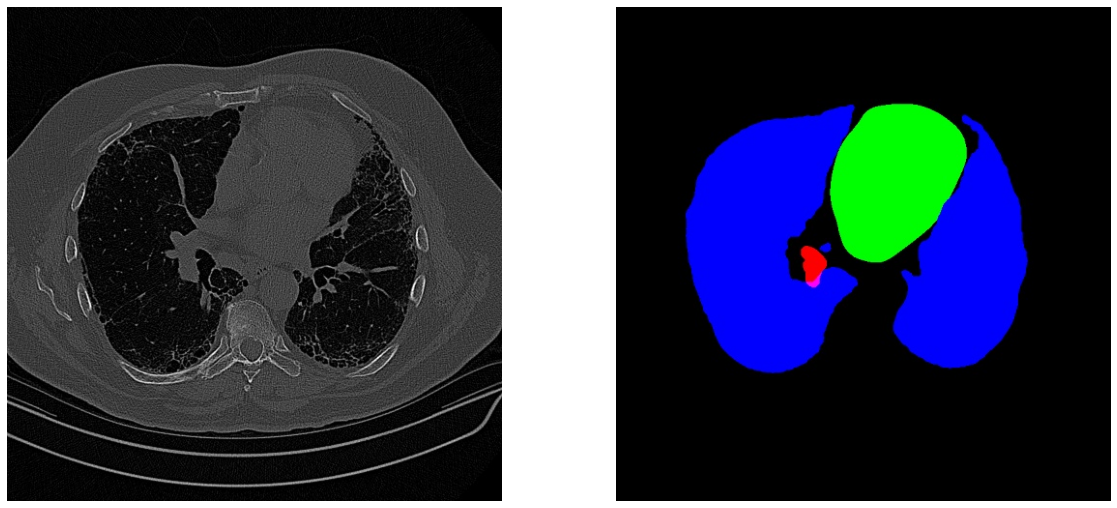

In [11]:
# ID00009637202177434476278_mask_203
pid = 'ID00009637202177434476278'
img_fn = f'{pid}_203.jpg'
msk_fn = f'{pid}_mask_203.jpg'
img_pth = os.path.join(raw_root_img_dir, img_fn)
msk_pth = os.path.join(raw_root_msk_dir, msk_fn)
img = np.array(Image.open(img_pth))
msk = np.array(Image.open(msk_pth))
show_imgs([img, msk],2)

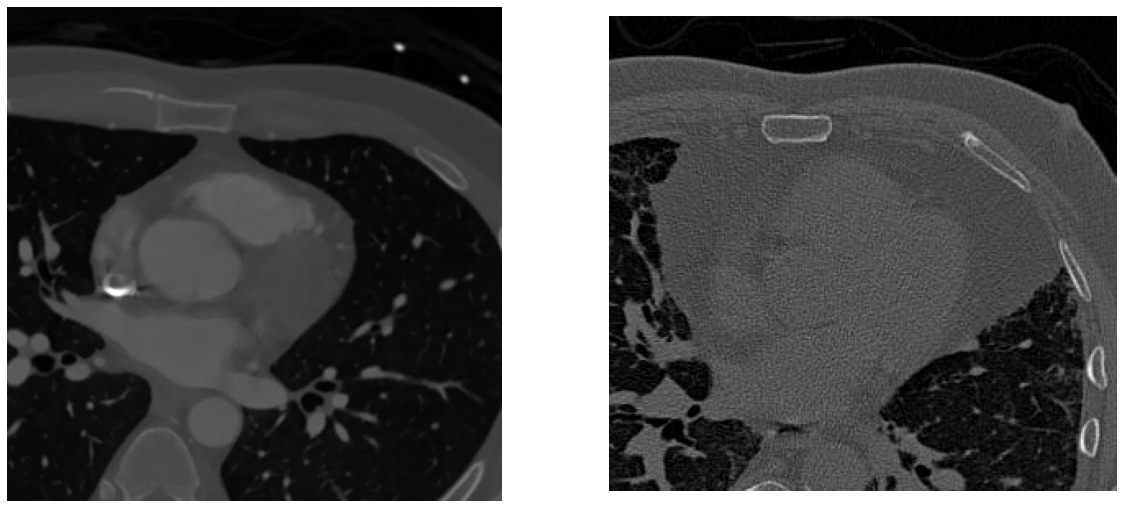

In [16]:
pid = 'ID00423637202312137826377'
img_fn = f'{pid}_159.jpg'
msk_fn = f'{pid}_mask_159.jpg'
img_pth = os.path.join(crop_root_img_dir, pid, img_fn)
zc_img_pth = os.path.join(root_corcta_dcm_jpg_dir, 'IM-0001-0089-0001.jpg')
img = np.array(Image.open(img_pth))
zc_img = np.array(Image.open(zc_img_pth))
show_imgs([zc_img, img],2)